In [1]:
import os
import numpy as np
import pandas as pd

In [216]:
path = os.getcwd() + '/fullGamesWithResultsAndRecentGame.csv'
data = pd.read_csv(path, nrows = 8116)
data

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeXG,AwayXG,HomeShots,AwayShots,HomeCorners,AwayCorners,HomeSubs,AwaySubs,HomeYC,AwayYC,HomeRC,AwayRC,HomeResult,AwayResult,HomeLastGame,AwayLastGame
0,Borussia Dortmund,Hamburg SV,3.0,1.0,1.8354,0.4050,13.0,4.0,7.0,7.0,3.0,3.0,1.0,3.0,0.0,0.0,2,0,0,0
1,FC Augsburg,SC Freiburg,2.0,2.0,1.6848,0.5423,10.0,6.0,5.0,4.0,3.0,2.0,2.0,4.0,0.0,0.0,1,1,0,0
2,Werder Bremen,Kaiserslautern,2.0,0.0,2.5788,1.0306,10.0,6.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0,0.0,2,0,0,0
3,Paris Saint-Germain,Lorient,0.0,1.0,0.5509,0.8049,9.0,7.0,7.0,6.0,3.0,3.0,1.0,3.0,0.0,0.0,0,2,0,0
4,Caen,Valenciennes,1.0,0.0,0.7052,1.5982,9.0,9.0,3.0,11.0,2.0,2.0,2.0,1.0,0.0,0.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,AS Nancy Lorraine,Lyon,0.0,3.0,0.7355,1.1688,8.0,8.0,4.0,4.0,3.0,3.0,4.0,2.0,0.0,0.0,0,2,2,2
8112,Nice,Stade Rennes,1.0,0.0,0.4784,1.4983,5.0,14.0,4.0,8.0,3.0,3.0,0.0,1.0,0.0,0.0,2,0,2,0
8113,Arsenal,Liverpool,3.0,4.0,1.4669,1.1577,8.0,10.0,5.0,4.0,3.0,3.0,3.0,3.0,0.0,0.0,0,2,2,1
8114,Marseille,Toulouse,0.0,0.0,0.7157,0.6828,8.0,6.0,9.0,6.0,3.0,3.0,3.0,1.0,0.0,0.0,1,1,2,2


In [217]:
# Imports for Decision Tree and Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [218]:
# Going to break into two datasets, one for home goal stuff, and one for away goal stuff

home = data[[ 'HomeTeam','HomeXG', 'HomeShots', 'HomeCorners', 'HomeSubs', 'HomeYC', 'HomeRC', 'HomeLastGame', 'HomeGoals', 'HomeResult']]
away = data[[ 'AwayTeam','AwayXG', 'AwayShots', 'AwayCorners', 'AwaySubs', 'AwayYC', 'AwayRC', 'AwayLastGame', 'AwayGoals', 'AwayResult']]

In [219]:
# Split into training and testing sets
trainHome, valHome = train_test_split(home, test_size=0.78, random_state=0)
trainAway, valAway = train_test_split(away, test_size=0.78, random_state=0)

In [220]:
# Break training into X and Y
cols = home.shape[1]
trainHomeX = trainHome.iloc[:,1:cols-1] # iloc slicing function 
trainHomeY = trainHome.iloc[:,cols-1]

trainAwayX = trainAway.iloc[:,1:cols-1] # iloc slicing function 
trainAwayY = trainAway.iloc[:,cols-1]

In [221]:
# Break validation into X and Y
cols = home.shape[1]
valHomeX = valHome.iloc[:,1:cols-1] # iloc slicing function 
valHomeY = valHome.iloc[:,cols-1]

valAwayX = valAway.iloc[:,1:cols-1] # iloc slicing function 
valAwayY = valAway.iloc[:,cols-1]

Going to start by building a decision tree, seeing how that scores, and then building a forest.

In [222]:
# Home Decision Tree
homeDtc = DecisionTreeClassifier(random_state=0).fit(trainHomeX, trainHomeY)
print(homeDtc.score(valHomeX, valHomeY))

0.544305796872532


In [223]:
# Away Decision Tree
awayDtc = DecisionTreeClassifier(random_state=0).fit(trainAwayX, trainAwayY)
print(awayDtc.score(valAwayX, valAwayY))

0.5169799399778866


So the scores are meh, going to try creating random forests for both the home team and the away team.

In [224]:
homeForest = RandomForestClassifier(n_estimators=100).fit(trainHomeX, np.ravel(trainHomeY))
print(homeForest.score(valHomeX, valHomeY))

0.6030642868425209


In [225]:
awayForest = RandomForestClassifier(n_estimators=100).fit(trainAwayX, np.ravel(trainAwayY))
print(awayForest.score(valAwayX, valAwayY))

0.5875848996998895


Had slightly better results from the random forests than with the decision trees.

Now going to try and predict the goal values and see how I did in predicting the results of games

In [226]:
predHome = homeForest.predict(valHomeX)
predAway = awayForest.predict(valAwayX)

# This outputs an array so want to convert it to a df

In [236]:
predHomedf = dfTeams = pd.DataFrame(predHome, columns = ['PredHomeResult'])
predAwaydf = dfTeams = pd.DataFrame(predAway, columns = ['PredAwayResult'])

In [237]:
# Reset all of the indexes
valHomeX = valHomeX.reset_index(drop = True)
valHomeY = valHomeY.reset_index(drop = True)

valAwayX = valAwayX.reset_index(drop = True) 
valAwayY = valAwayY.reset_index(drop = True)

In [238]:
dfFullHome = pd.concat([valHomeX, valHomeY, predHomedf], axis = 1, join = 'inner')
dfFullAway = pd.concat([valAwayX, valAwayY, predAwaydf], axis = 1, join = 'inner')

dfBoth = pd.concat([dfFullHome, dfFullAway], axis = 1, join = 'inner')

In [239]:
dfBoth

,HomeXG,HomeShots,HomeCorners,HomeSubs,HomeYC,HomeRC,HomeLastGame,HomeGoals,HomeResult,PredHomeResult,AwayXG,AwayShots,AwayCorners,AwaySubs,AwayYC,AwayRC,AwayLastGame,AwayGoals,AwayResult,PredAwayResult
0,1.1559,5.0,1.0,3.0,1.0,0.0,0,3.0,2,2,1.4279,14.0,2.0,3.0,2.0,1.0,1,0.0,0,0
1,1.5210,10.0,3.0,3.0,1.0,0.0,0,2.0,2,2,0.8083,9.0,9.0,3.0,5.0,0.0,2,1.0,0,1
2,1.5177,12.0,2.0,3.0,0.0,0.0,1,3.0,2,2,0.6445,10.0,7.0,3.0,2.0,0.0,1,0.0,0,0
3,2.7798,18.0,9.0,3.0,1.0,0.0,0,3.0,2,2,1.0486,9.0,5.0,3.0,1.0,0.0,1,1.0,0,0
4,1.8379,10.0,8.0,3.0,1.0,0.0,2,3.0,2,2,1.2281,9.0,6.0,3.0,1.0,0.0,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,1.1659,12.0,2.0,3.0,3.0,0.0,0,0.0,1,0,1.6308,14.0,7.0,3.0,5.0,0.0,0,0.0,1,0
6327,0.7988,10.0,5.0,3.0,2.0,0.0,2,1.0,1,0,1.9614,12.0,4.0,3.0,4.0,0.0,1,1.0,1,0
6328,1.4912,7.0,6.0,3.0,3.0,0.0,0,3.0,2,2,2.2222,9.0,8.0,3.0,3.0,0.0,2,0.0,0,0
6329,1.2213,11.0,6.0,2.0,2.0,0.0,0,0.0,1,0,0.4657,3.0,1.0,3.0,3.0,0.0,0,0.0,1,0


Now going to see how well the model performed

In [241]:
corHomeGoals = 0
corAwayGoals = 0
corResults = 0
equalRaw = 0
totalDraws = 0

for i in range(dfBoth.shape[0]):
    # Check if goals were predicted correctly
    if(dfBoth['HomeResult'][i] == dfBoth['PredHomeResult'][i]):
        corHomeGoals += 1
    if(dfBoth['AwayResult'][i] == dfBoth['PredAwayResult'][i]):
        corAwayGoals += 1
        
    # Check results with predicted goal values 
    if((dfBoth['HomeResult'][i] == dfBoth['AwayResult'][i]) & (dfBoth['PredHomeResult'][i] == dfBoth['PredAwayResult'][i])):
        corResults += 1
    if((dfBoth['HomeResult'][i] < dfBoth['AwayResult'][i]) & (dfBoth['PredHomeResult'][i] < dfBoth['PredAwayResult'][i])):
        corResults += 1
    if((dfBoth['HomeResult'][i] > dfBoth['AwayResult'][i]) & (dfBoth['PredHomeResult'][i] > dfBoth['PredAwayResult'][i])):
        corResults += 1
    
    # Get total Draws
    if(dfBoth['HomeResult'][i] == dfBoth['AwayResult'][i]):
        totalDraws += 1

In [242]:
print(corHomeGoals)
print(corAwayGoals)
print(corResults)

3818
3720
4292


In [244]:
print("Results: ")
print("Home Result Proportion: " , corHomeGoals / dfBoth.shape[0])
print("Away Result Proportion: " , corAwayGoals / dfBoth.shape[0])
print("Overall Result Proportion: " , (corHomeGoals + corAwayGoals) / (2 * dfBoth.shape[0]))
print("Correct Result Proportion: " , corResults / dfBoth.shape[0])

Results: 
Home Result Proportion:  0.6030642868425209
Away Result Proportion:  0.5875848996998895
Overall Result Proportion:  0.5953245932712051
Correct Result Proportion:  0.6779339756752488


Going to try and make a visualization

In [188]:
actualWins = 0
actualDraws = 0
actualLosses = 0

predWins = 0
predDraws = 0
predLosses = 0


for i in range(dfBoth.shape[0]):
    # Get totals for actual results
    if(dfBoth['HomeGoals'][i] < dfBoth['AwayGoals'][i]):
        actualLosses += 1
    if(dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]):
        actualDraws += 1
    if(dfBoth['HomeGoals'][i] > dfBoth['AwayGoals'][i]):
        actualWins += 1
    
    # Get totals for predicted results
    if(dfBoth['PredHomeGoals'][i] < dfBoth['PredAwayGoals'][i]):
        predLosses += 1
    if(dfBoth['PredHomeGoals'][i] == dfBoth['PredAwayGoals'][i]):
        predDraws += 1
    if(dfBoth['PredHomeGoals'][i] > dfBoth['PredAwayGoals'][i]):
        predWins += 1


In [189]:
import matplotlib.pyplot as plt

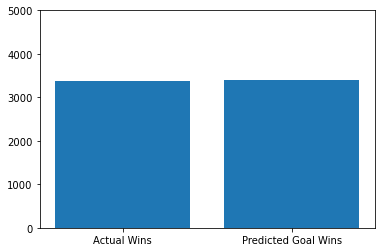

In [190]:
x = np.array(['Actual Wins', 'Predicted Goal Wins'])
y = np.array([actualWins, predWins])

plt.bar(x, y)
plt.ylim([0,5000])
plt.show()

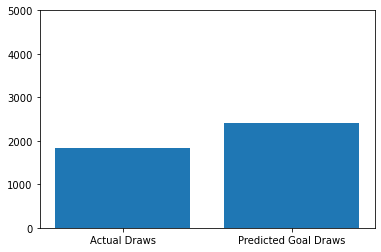

In [191]:
x = np.array(['Actual Draws', 'Predicted Goal Draws'])
y = np.array([actualDraws, predDraws])

plt.bar(x, y)
plt.ylim([0,5000])
plt.show()

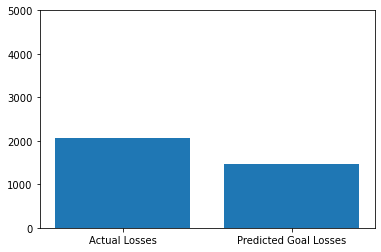

In [192]:
x = np.array(['Actual Losses', 'Predicted Goal Losses'])
y = np.array([actualLosses, predLosses])

plt.bar(x, y)
plt.ylim([0,5000])
plt.show()